## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px

In [2]:
fifa = pd.read_csv("fifa21 raw data v2.csv")
fifa.head()

C:\Users\Wave\AppData\Local\Temp\ipykernel_2376\653513803.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv("fifa21 raw data v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [3]:
fifa.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [4]:
fifa.isna().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             0
DRI             0
DEF             0
PHY             0
Hits         2595
Length: 77, dtype: int64

In [5]:
fifa.isna()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18976,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18977,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [7]:
fifa.iloc[18974:18979]


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN
18978,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,62,22,39,42,45,55,NaN


In [8]:
fifa.Club

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [9]:
fifa.Hits.isna().sum()

2595

In [10]:
fifa.Hits.str.isnumeric().value_counts()

Hits
True     16329
False       28
Name: count, dtype: int64

In [11]:
fifa['Hits'].fillna(method='ffill', inplace=True)

C:\Users\Wave\AppData\Local\Temp\ipykernel_2376\859290581.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fifa['Hits'].fillna(method='ffill', inplace=True)


In [12]:
fifa['Hits'].isna().sum()

0

In [13]:
fifa.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [14]:
fifa1 = fifa
fifa1 = fifa1.sample(n = 100, random_state=1)
fifa1

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
16585,252634,Lee Ji Seung,Ji Seung Lee,https://cdn.sofifa.com/players/252/634/21_60.png,http://sofifa.com/player/252634/ji-seung-lee/2...,Korea Republic,21,58,69,\n\n\n\nBusan IPark,...,Medium,Medium,1 ★,61,48,54,56,54,60,1.0
17152,256975,F. Rahimi,Fuad Rahimi,https://cdn.sofifa.com/players/256/975/21_60.png,http://sofifa.com/player/256975/fuad-rahimi/21...,Kosovo,22,57,65,\n\n\n\nFC Vaduz,...,Medium,Medium,1 ★,72,25,40,53,54,65,6.0
15755,231510,M. Watson,Max Watson,https://cdn.sofifa.com/players/231/510/21_60.png,http://sofifa.com/player/231510/max-watson/210...,Sweden,24,59,64,\n\n\n\nMjällby AIF,...,Medium,Medium,1 ★,51,22,38,34,58,66,2
9360,201940,Z. MacMath,Zac MacMath,https://cdn.sofifa.com/players/201/940/21_60.png,http://sofifa.com/player/201940/zac-macmath/21...,United States,28,66,66,\n\n\n\nReal Salt Lake,...,Medium,Medium,1 ★,66,64,54,67,36,67,4
227,208418,Y. Carrasco,Yannick Carrasco,https://cdn.sofifa.com/players/208/418/21_60.png,http://sofifa.com/player/208418/yannick-carras...,Belgium,26,82,82,\n\n\n\nAtlético Madrid,...,High,Low,3 ★,91,81,75,84,36,65,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,150724,J. Hart,Joe Hart,https://cdn.sofifa.com/players/150/724/21_60.png,http://sofifa.com/player/150724/joe-hart/210006/,England,33,75,75,\n\n\n\nTottenham Hotspur,...,Medium,Medium,3 ★,72,75,65,77,58,74,78
8472,213274,L. Ojeda,Luis Ojeda,https://cdn.sofifa.com/players/213/274/21_60.png,http://sofifa.com/player/213274/luis-ojeda/210...,Argentina,30,66,67,\n\n\n\nJorge Wilstermann,...,Medium,Medium,1 ★,63,63,60,69,45,65,1
2093,241470,Álex Centelles,Alejandro Centelles Plaza,https://cdn.sofifa.com/players/241/470/21_60.png,http://sofifa.com/player/241470/alejandro-cent...,Spain,20,74,84,\n\n\n\nUD Almería,...,Medium,Medium,1 ★,74,49,68,69,69,72,116
18368,246046,J. Piggott,Joe Piggott,https://cdn.sofifa.com/players/246/046/21_60.png,http://sofifa.com/player/246046/joe-piggott/21...,England,21,52,66,\n\n\n\nWigan Athletic,...,Medium,Medium,1 ★,57,54,40,52,18,49,6.0


In [15]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(fifa1):
    # Replace missing values with the most common value of each column in: 'Hits'
    fifa1 = fifa1.fillna({'Hits': fifa1['Hits'].mode()[0]})
    return fifa1

fifa1_clean = clean_data(fifa1.copy())
fifa1_clean.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
16585,252634,Lee Ji Seung,Ji Seung Lee,https://cdn.sofifa.com/players/252/634/21_60.png,http://sofifa.com/player/252634/ji-seung-lee/2...,Korea Republic,21,58,69,\n\n\n\nBusan IPark,...,Medium,Medium,1 ★,61,48,54,56,54,60,1.0
17152,256975,F. Rahimi,Fuad Rahimi,https://cdn.sofifa.com/players/256/975/21_60.png,http://sofifa.com/player/256975/fuad-rahimi/21...,Kosovo,22,57,65,\n\n\n\nFC Vaduz,...,Medium,Medium,1 ★,72,25,40,53,54,65,6.0
15755,231510,M. Watson,Max Watson,https://cdn.sofifa.com/players/231/510/21_60.png,http://sofifa.com/player/231510/max-watson/210...,Sweden,24,59,64,\n\n\n\nMjällby AIF,...,Medium,Medium,1 ★,51,22,38,34,58,66,2
9360,201940,Z. MacMath,Zac MacMath,https://cdn.sofifa.com/players/201/940/21_60.png,http://sofifa.com/player/201940/zac-macmath/21...,United States,28,66,66,\n\n\n\nReal Salt Lake,...,Medium,Medium,1 ★,66,64,54,67,36,67,4
227,208418,Y. Carrasco,Yannick Carrasco,https://cdn.sofifa.com/players/208/418/21_60.png,http://sofifa.com/player/208418/yannick-carras...,Belgium,26,82,82,\n\n\n\nAtlético Madrid,...,High,Low,3 ★,91,81,75,84,36,65,132


In [16]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(fifa1):
    # Replace all instances of "€" with "" in column: 'Value'
    fifa1['Value'] = fifa1['Value'].str.replace("€", "", case=False, regex=False)
    # Replace all instances of "K" with "000" in column: 'Value'
    fifa1['Value'] = fifa1['Value'].str.replace("K", "000", case=False, regex=False)
    # Replace all instances of "M" with "000000" in column: 'Value'
    fifa1['Value'] = fifa1['Value'].apply(lambda x: int(float(x.replace('M', '')) * 1000000) if 'M' in x else int(x))
    # Replace all instances of "€" with "" in column: 'Wage'
    fifa1['Wage'] = fifa1['Wage'].str.replace("€", "", case=False, regex=False)
    # Replace all instances of "K" with "000" in column: 'Wage'
    fifa1['Wage'] = fifa1['Wage'].str.replace("K", "000", case=False, regex=False)
    return fifa1

fifa1_clean = clean_data(fifa1.copy())
fifa1_clean.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
16585,252634,Lee Ji Seung,Ji Seung Lee,https://cdn.sofifa.com/players/252/634/21_60.png,http://sofifa.com/player/252634/ji-seung-lee/2...,Korea Republic,21,58,69,\n\n\n\nBusan IPark,...,Medium,Medium,1 ★,61,48,54,56,54,60,1.0
17152,256975,F. Rahimi,Fuad Rahimi,https://cdn.sofifa.com/players/256/975/21_60.png,http://sofifa.com/player/256975/fuad-rahimi/21...,Kosovo,22,57,65,\n\n\n\nFC Vaduz,...,Medium,Medium,1 ★,72,25,40,53,54,65,6.0
15755,231510,M. Watson,Max Watson,https://cdn.sofifa.com/players/231/510/21_60.png,http://sofifa.com/player/231510/max-watson/210...,Sweden,24,59,64,\n\n\n\nMjällby AIF,...,Medium,Medium,1 ★,51,22,38,34,58,66,2
9360,201940,Z. MacMath,Zac MacMath,https://cdn.sofifa.com/players/201/940/21_60.png,http://sofifa.com/player/201940/zac-macmath/21...,United States,28,66,66,\n\n\n\nReal Salt Lake,...,Medium,Medium,1 ★,66,64,54,67,36,67,4
227,208418,Y. Carrasco,Yannick Carrasco,https://cdn.sofifa.com/players/208/418/21_60.png,http://sofifa.com/player/208418/yannick-carras...,Belgium,26,82,82,\n\n\n\nAtlético Madrid,...,High,Low,3 ★,91,81,75,84,36,65,132


In [17]:
fifa2 = fifa1[['Name','POT','Age','Hits','Value','Wage','Preferred Foot','Height','Weight','Finishing']]

In [18]:
fifa2.head()

,Name,POT,Age,Hits,Value,Wage,Preferred Foot,Height,Weight,Finishing
16585,Lee Ji Seung,69,21,1.0,€425K,€800,Right,181cm,74kg,40
17152,F. Rahimi,65,22,6.0,€350K,€1K,Right,187cm,84kg,23
15755,M. Watson,64,24,2,€300K,€500,Right,186cm,82kg,18
9360,Z. MacMath,66,28,4,€600K,€2K,Right,188cm,88kg,18
227,Y. Carrasco,82,26,132,€33.5M,€68K,Right,185cm,73kg,81


In [19]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(fifa2):
    # Replace all instances of "€" with "" in column: 'Value'
    fifa2['Value'] = fifa2['Value'].str.replace("€", "", case=False, regex=False)
    # Replace all instances of "k" with "000" in column: 'Value'
    fifa2['Value'] = fifa2['Value'].str.replace("k", "000", case=False, regex=False)
    # Replace all instances of "" with "" in column: 'Value'
    fifa2['Value'] = fifa2['Value'].apply(lambda x: int(float(x.replace('M', '')) * 1000000) if 'M' in x else int(x))
    # Replace all instances of "€" with "" in column: 'Wage'
    fifa2['Wage'] = fifa2['Wage'].str.replace("€", "", case=False, regex=False)
    # Replace all instances of "K" with "000" in column: 'Wage'
    fifa2['Wage'] = fifa2['Wage'].str.replace("K", "000", case=False, regex=False)
    # Replace all instances of "CM" with ".00" in columns: 'Wage', 'Height'
    fifa2['Wage'] = fifa2['Wage'].str.replace("CM", ".00", case=False, regex=False)
    fifa2['Height'] = fifa2['Height'].str.replace("CM", ".00", case=False, regex=False)
    # Replace all instances of "KG" with ".00" in column: 'Weight'
    fifa2['Weight'] = fifa2['Weight'].str.replace("KG", ".00", case=False, regex=False)
    return fifa2

fifa2_clean = clean_data(fifa2.copy())
fifa2_clean.head()

,Name,POT,Age,Hits,Value,Wage,Preferred Foot,Height,Weight,Finishing
16585,Lee Ji Seung,69,21,1.0,425000,800,Right,181.00,74.00,40
17152,F. Rahimi,65,22,6.0,350000,1000,Right,187.00,84.00,23
15755,M. Watson,64,24,2,300000,500,Right,186.00,82.00,18
9360,Z. MacMath,66,28,4,600000,2000,Right,188.00,88.00,18
227,Y. Carrasco,82,26,132,33500000,68000,Right,185.00,73.00,81


In [20]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(fifa2_clean):
    # Replace all instances of "Right" with "1" in column: 'Preferred Foot'
    fifa2_clean['Preferred Foot'] = fifa2_clean['Preferred Foot'].str.replace("Right", "1", case=False, regex=False)
    # Replace all instances of "lef" with "0" in column: 'Preferred Foot'
    fifa2_clean['Preferred Foot'] = fifa2_clean['Preferred Foot'].str.replace("left", "0", case=False, regex=False)
    return fifa2_clean

fifa2_clean_1 = clean_data(fifa2_clean.copy())
fifa2_clean_1.head()

,Name,POT,Age,Hits,Value,Wage,Preferred Foot,Height,Weight,Finishing
16585,Lee Ji Seung,69,21,1.0,425000,800,1,181.00,74.00,40
17152,F. Rahimi,65,22,6.0,350000,1000,1,187.00,84.00,23
15755,M. Watson,64,24,2,300000,500,1,186.00,82.00,18
9360,Z. MacMath,66,28,4,600000,2000,1,188.00,88.00,18
227,Y. Carrasco,82,26,132,33500000,68000,1,185.00,73.00,81


In [21]:
fifa2_clean_1['Preferred Foot'] = fifa2_clean_1['Preferred Foot'].astype(int)

In [22]:
fifa2_clean_1['Preferred Foot']

16585    1
17152    1
15755    1
9360     1
227      1
        ..
1892     1
8472     1
2093     0
18368    1
13901    1
Name: Preferred Foot, Length: 100, dtype: int32

In [23]:
#sns.heatmap(fifa2_clean_1.corr(), annot=True)

In [24]:
fifa2_clean_1


,Name,POT,Age,Hits,Value,Wage,Preferred Foot,Height,Weight,Finishing
16585,Lee Ji Seung,69,21,1.0,425000,800,1,181.00,74.00,40
17152,F. Rahimi,65,22,6.0,350000,1000,1,187.00,84.00,23
15755,M. Watson,64,24,2,300000,500,1,186.00,82.00,18
9360,Z. MacMath,66,28,4,600000,2000,1,188.00,88.00,18
227,Y. Carrasco,82,26,132,33500000,68000,1,185.00,73.00,81
...,...,...,...,...,...,...,...,...,...,...
1892,J. Hart,75,33,78,1800000,50000,1,196.00,91.00,14
8472,L. Ojeda,67,30,1,650000,500,1,183.00,83.00,12
2093,Álex Centelles,84,20,116,9000000,6000,0,186.00,78.00,45
18368,J. Piggott,66,21,6.0,200000,800,1,180.00,70.00,56


In [25]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(fifa2_clean_1):
    # Replace gaps forward from the previous valid value in: 'Hits'
    fifa2_clean_1 = fifa2_clean_1.fillna({'Hits': fifa2_clean_1['Hits'].ffill()})
    return fifa2_clean_1

fifa2_clean_2 = clean_data(fifa2_clean_1.copy())
fifa2_clean_2.head()

,Name,POT,Age,Hits,Value,Wage,Preferred Foot,Height,Weight,Finishing
16585,Lee Ji Seung,69,21,1.0,425000,800,1,181.00,74.00,40
17152,F. Rahimi,65,22,6.0,350000,1000,1,187.00,84.00,23
15755,M. Watson,64,24,2,300000,500,1,186.00,82.00,18
9360,Z. MacMath,66,28,4,600000,2000,1,188.00,88.00,18
227,Y. Carrasco,82,26,132,33500000,68000,1,185.00,73.00,81


In [26]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(fifa2_clean_2):
    # Replace gaps back from the next valid value in: 'Hits'
    fifa2_clean_2 = fifa2_clean_2.fillna({'Hits': fifa2_clean_2['Hits'].bfill()})
    return fifa2_clean_2

fifa2_clean_3 = clean_data(fifa2_clean_2.copy())
fifa2_clean_3.head()

,Name,POT,Age,Hits,Value,Wage,Preferred Foot,Height,Weight,Finishing
16585,Lee Ji Seung,69,21,1.0,425000,800,1,181.00,74.00,40
17152,F. Rahimi,65,22,6.0,350000,1000,1,187.00,84.00,23
15755,M. Watson,64,24,2,300000,500,1,186.00,82.00,18
9360,Z. MacMath,66,28,4,600000,2000,1,188.00,88.00,18
227,Y. Carrasco,82,26,132,33500000,68000,1,185.00,73.00,81


## 1. The average age in the given dataset is 25

In [27]:
fifa['Age'].mean()


25.194109278676432

## 2. Which club has the highest average player rating
### FC Bayern München has the highest average player rating

In [28]:
Club = fifa.groupby('Club')['↓OVA'].mean().sort_values(ascending = False).head(20)

In [29]:
Club

Club
\n\n\n\nFC Bayern München      81.478261
\n\n\n\nReal Madrid            79.766667
\n\n\n\nInter                  79.346154
\n\n\n\nNapoli                 78.692308
\n\n\n\nChelsea                78.181818
\n\n\n\nManchester United      78.090909
\n\n\n\nJuventus               78.071429
\n\n\n\nParis Saint-Germain    77.966667
\n\n\n\nLiverpool              77.393939
\n\n\n\nSevilla FC             77.285714
\n\n\n\nTottenham Hotspur      76.909091
\n\n\n\nSL Benfica             76.851852
\n\n\n\nFC Barcelona           76.757576
\n\n\n\nManchester City        76.666667
\n\n\n\nAtlético Madrid        76.187500
\n\n\n\nArsenal                75.878788
\n\n\n\nLazio                  75.531250
\n\n\n\nRoma                   75.500000
\n\n\n\nBayer 04 Leverkusen    75.464286
\n\n\n\nFlamengo               75.400000
Name: ↓OVA, dtype: float64

In [30]:
fifa.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

## 3. Distribution of players position

In [31]:
positions_no = pd.DataFrame(fifa['Positions'].value_counts()/fifa['Positions'].count()*100)
positions_no
#positions['Pos_pct'] = fifa['Positions'].value_counts()/fifa['Positions'].count()*100
#position = fifa['Positions']


,count
Positions,
CB,12.861584
GK,10.927868
ST,9.821382
"CDM, CM",4.436482
CM,4.188840
...,...
"RM, RW, RB",0.005269
"LB, RM, RB",0.005269
"CDM, RM, CM",0.005269


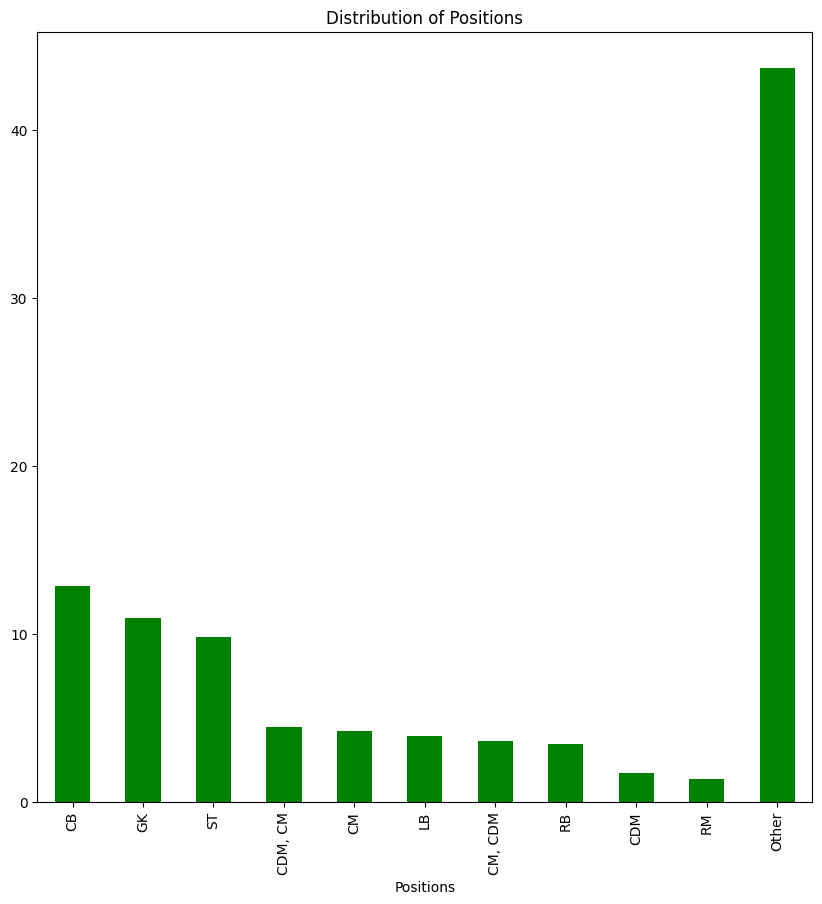

In [32]:
top_positions = positions_no.head(10).copy()
other_count = positions_no.iloc[10:].sum()
top_positions.loc['Other'] = other_count
top_positions.plot(kind = "bar", figsize = (10,10), title = "Distribution of Positions", legend = False, color='g')
plt.show()

## 4. Is there a correlation between a player's age and their potential (POT)?
* Players potential decrease as they grow older

<Axes: >

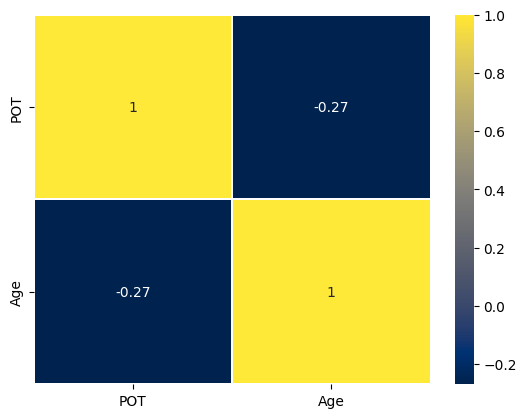

In [74]:
Potential = fifa[['POT', 'Age']]

sns.heatmap(Potential.corr(), annot = True, cmap = 'cividis', linewidths = 0.2)

## 5. The average value of left-footed players compared to right-footed players is
* Left     €3,151,647.55
* Right    €2,775,109.66

In [34]:
fifa['Preferred Foot'].value_counts()

Preferred Foot
Right    14445
Left      4534
Name: count, dtype: int64

In [35]:
fifa

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,6.0
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,6.0
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,6.0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,6.0


In [36]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(fifa):
    # Replace all instances of "€" with "" in column: 'Value'
    fifa['Value'] = fifa['Value'].str.replace("€", "", case=False, regex=False)
    # Replace all instances of "k" with "000" in column: 'Value'
    fifa['Value'] = fifa['Value'].str.replace("k", "000", case=False, regex=False)
    
    # Replace all instances of "" with "" in column: 'Value'
    fifa['Value'] = fifa['Value'].apply(lambda x: int(float(x.replace('M', '')) * 1000000) if 'M' in x else int(x))
    return fifa

fifa_clean = clean_data(fifa.copy())
fifa_clean.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [37]:
left_foot_avg_value = fifa_clean[fifa_clean['Preferred Foot'] == 'Left']['Value'].mean()

right_foot_avg_value = fifa_clean[fifa_clean['Preferred Foot'] == 'Right']['Value'].mean()

print("Average value of left-footed players:", left_foot_avg_value)
print("Average value of right-footed players:", right_foot_avg_value)

Average value of left-footed players: 3151647.548742832
Average value of right-footed players: 2775109.655313257


In [38]:
average_value = fifa_clean.groupby('Preferred Foot')['Value'].mean()
formatted_value = average_value.map('€{:,.2f}'.format)
#formatted_value


Preferred Foot
Left     €3,151,647.55
Right    €2,775,109.66
Name: Value, dtype: object

## 6. The average player height and weight vary by nationality

In [39]:
def clean_data(fifa):
    fifa['Height'] = fifa['Height'].str.replace("cm", "", case=False, regex=False)
    fifa['Weight'] = fifa['Weight'].str.replace("kg", "", case=False, regex=False)
    fifa['Release Clause'] = fifa['Release Clause'].str.replace("€", "", case=False, regex=False)
    fifa['Release Clause'] = fifa['Release Clause'].str.replace("k", "000", case=False, regex=False)
    fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x: int(float(x.replace('M', '')) * 1000000) if 'M' in x else int(x))
    fifa['Wage'] = fifa['Wage'].str.replace("€", "", case=False, regex=False)
    fifa['Wage'] = fifa['Wage'].str.replace("k", "000", case=False, regex=False)
    fifa['Wage'] = fifa['Wage'].apply(lambda x: int(float(x.replace('M', '')) * 1000000) if 'M' in x else int(x))
    
    return fifa
cleann_fifa = clean_data(fifa.copy())
cleann_fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [40]:
cleann_fifa['Height'].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '6\'2"', '164', '198', '6\'3"', '6\'5"', '5\'11"', '6\'4"',
       '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"', '5\'4"',
       '201', '158', '162', '161', '160', '203', '157', '156', '202',
       '159', '206', '155'], dtype=object)

In [41]:
def convert_to_cm(height):
    if "'" in height:
          # Check if the height is in feet and inches format
        feet, inches = map(int, re.findall(r'\d+', height))  # Extract numeric values using regular expression
        total_inches = feet * 12 + inches
        cm = total_inches * 2.54
        return cm
    else:  # Assume the height is in centimeters or another format
        numeric_value = ''.join(filter(str.isdigit, height))  # Extract numeric characters
        return int(numeric_value)
cleann_fifa['Height'] = cleann_fifa['Height'].apply(convert_to_cm)
    

In [42]:
cleann_fifa['Height'].unique()

array([170.  , 187.  , 188.  , 181.  , 175.  , 184.  , 191.  , 178.  ,
       193.  , 185.  , 199.  , 173.  , 168.  , 176.  , 177.  , 183.  ,
       180.  , 189.  , 179.  , 195.  , 172.  , 182.  , 186.  , 192.  ,
       165.  , 194.  , 167.  , 196.  , 163.  , 190.  , 174.  , 169.  ,
       171.  , 197.  , 200.  , 166.  , 187.96, 164.  , 198.  , 190.5 ,
       195.58, 180.34, 193.04, 185.42, 182.88, 177.8 , 175.26, 167.64,
       170.18, 162.56, 201.  , 158.  , 162.  , 161.  , 160.  , 203.  ,
       157.  , 156.  , 202.  , 159.  , 206.  , 155.  ])

In [43]:
cleann_fifa.Weight.unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [44]:
def convert_to_kg(weight):
    if 'lbs' in weight:  # Check if the weight is in pounds
        pounds = int(re.search(r'\d+', weight).group())  # Extract the numeric value of pounds
        kg = pounds * 0.453592  # Convert pounds to kilograms
        return kg
    else:  # Assume the weight is already in kilograms
        return int(weight) 

cleann_fifa['Weight'] = cleann_fifa['Weight'].apply(convert_to_kg)

In [52]:
Nationality_HW = cleann_fifa.groupby('Nationality')[['Height','Weight']].mean()
Nationality_HW


,Height,Weight
Nationality,,
Afghanistan,172.500000,65.000000
Albania,182.400000,76.120000
Algeria,181.660377,75.377358
Andorra,184.000000,79.000000
Angola,178.882353,73.764706
...,...,...
Uzbekistan,179.625000,72.125000
Venezuela,177.758794,72.783920
Wales,181.251969,73.881890


## 7. Player with the highest release clause

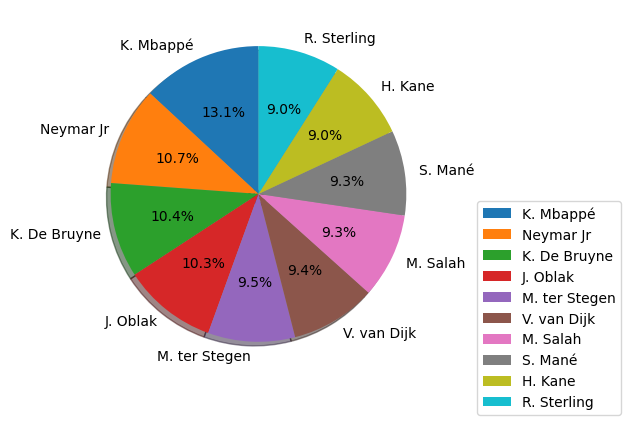

In [70]:
Release_clause = cleann_fifa.groupby('Name')['Release Clause'].max().sort_values(ascending=False)
top_clause = Release_clause.head(10).copy()
#Other_clause = Release_clause.iloc[10:].sum()
#top_clause.loc['Other'] = Other_clause
top_clause
#top_clause["Release Clause"] = top_clause["Release Clause"].map('€{:,.2f}'.format)
plt.pie(top_clause,labels = top_clause.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(loc = "best", bbox_to_anchor = (1.5, 0.5));

## 8. Distribution of Wage based on positions

<function matplotlib.pyplot.show(close=None, block=None)>

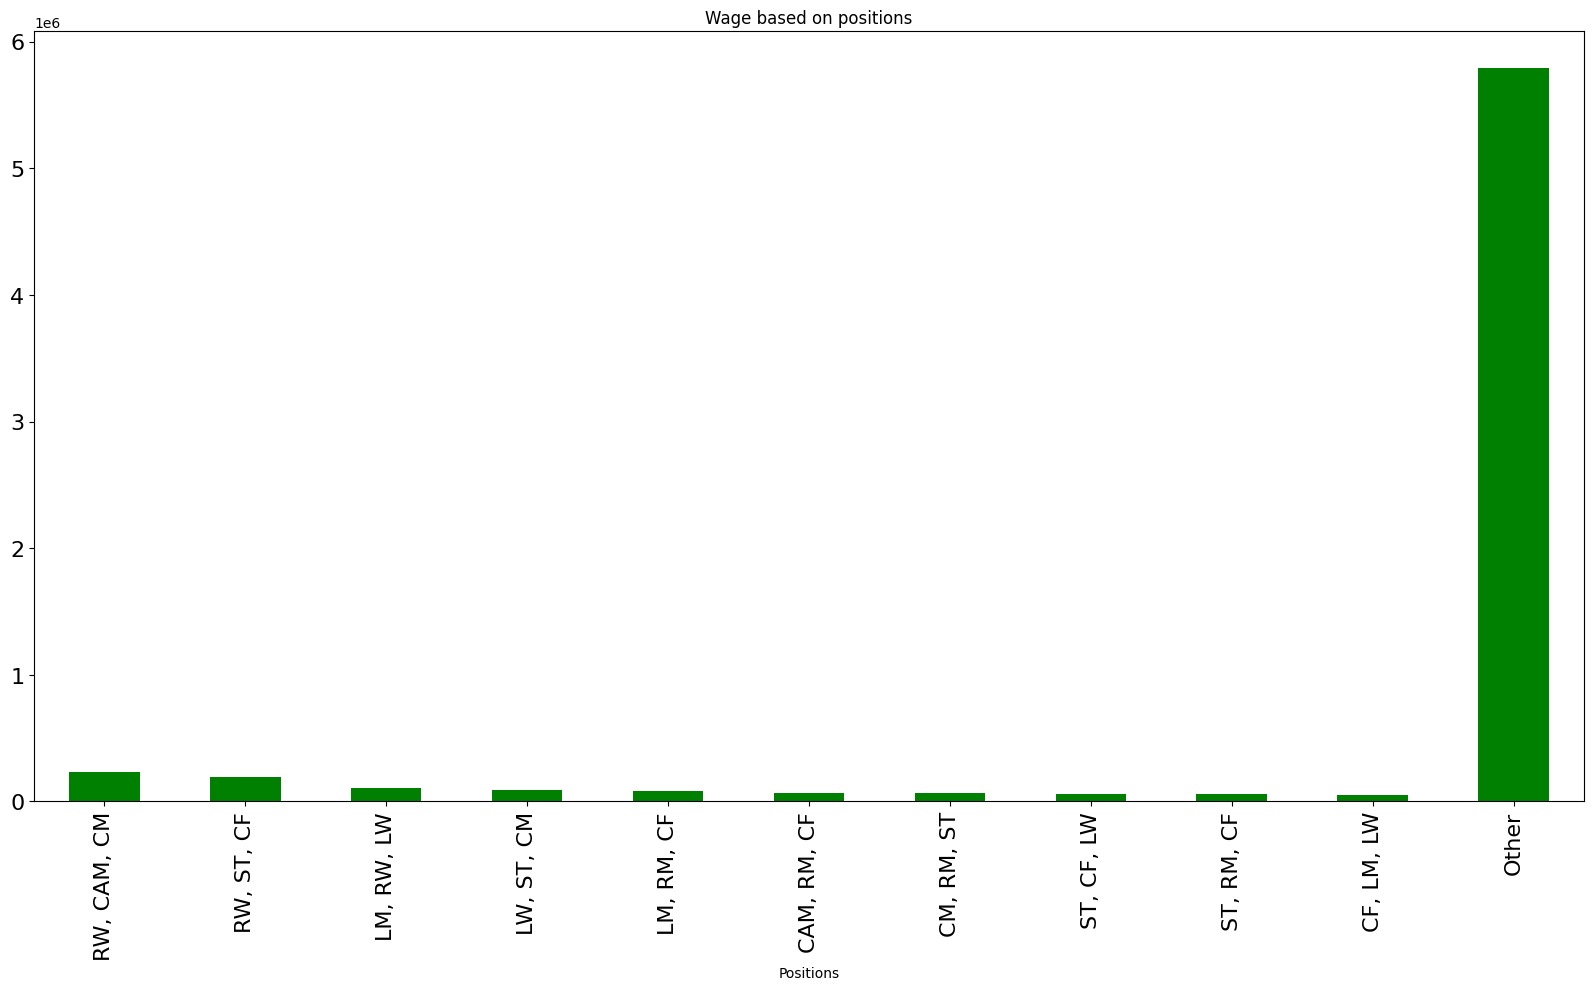

In [47]:
wage = cleann_fifa.groupby('Positions')['Wage'].mean().sort_values(ascending = False)
top_wage = wage.head(10).copy()
other_wage = wage.iloc[10:].sum()
top_wage.loc['Other'] = other_wage
top_wage.plot(kind = "bar",figsize=(20,10), title = "Wage based on positions",fontsize = 16, legend = False, color = 'g')
plt.show

## 9. Relationship between a player's attacking stats and their overall rating

In [48]:
Attack = pd.DataFrame(cleann_fifa, columns = ['↓OVA', 'Attacking'])
#plt.scatter(cleann_fifa['↓OVA'], cleann_fifa['Attacking'], marker = '.', color = 'brown')

## How does the average player rating (OVA) vary by preferred foot?

In [49]:
Average_overall_rating = pd.DataFrame(cleann_fifa.groupby('Preferred Foot')["↓OVA"].mean().sort_values(ascending = False))

In [50]:
Average_overall_rating

,↓OVA
Preferred Foot,
Left,66.305249
Right,65.534510


## Visualization of information

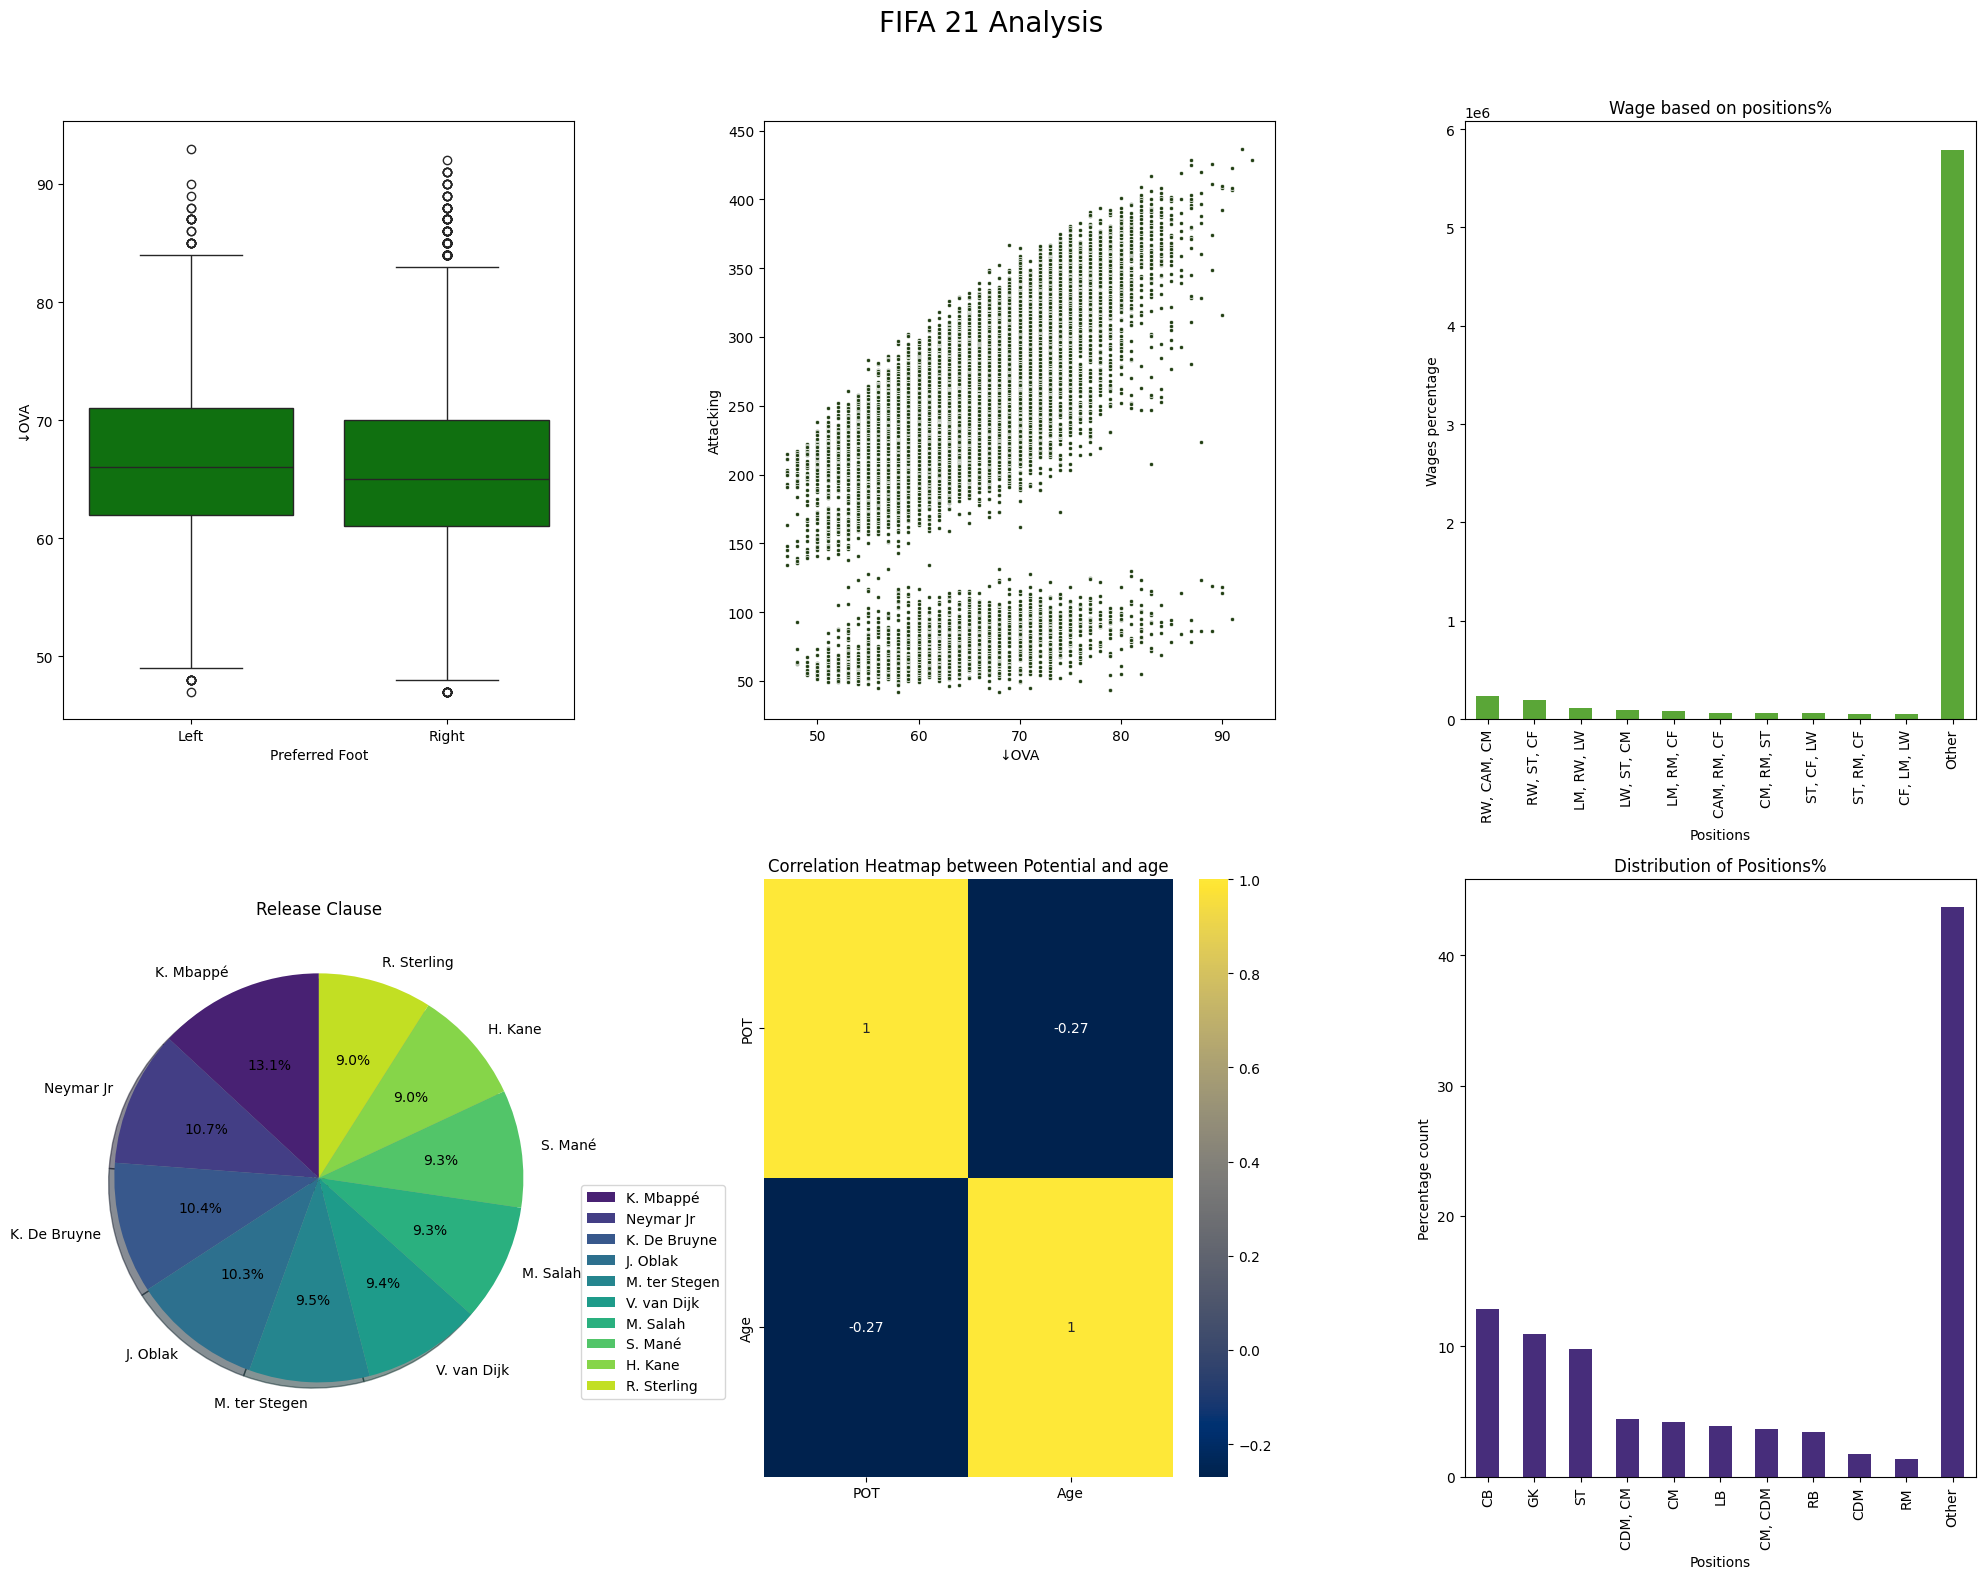

In [117]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

sns.boxplot(x='Preferred Foot', y='↓OVA', data=cleann_fifa, ax=axes[0, 0], color = "g")
sns.scatterplot(data=Attack, x='↓OVA', y="Attacking", marker='.', color='#234015', ax=axes[0, 1])
top_wage.plot(kind="bar", title="Wage based on positions", legend=False, color='#5AA637', ax=axes[0, 2])
axes[0, 2].set_title("Wage based on positions%")
axes[0, 2].set_ylabel("Wages percentage")

colors = sns.color_palette("viridis", len(top_clause))
top_clause.plot(kind="pie", labels=top_clause.index, autopct='%1.1f%%', shadow=True, startangle=90, ax=axes[1, 0], colors = colors)
axes[1, 0].set_title("Release Clause")
axes[1, 0].set_ylabel("")
axes[1, 0].legend(loc="best", bbox_to_anchor=(1, 0.5))


Potential = fifa[['POT', 'Age']]
sns.heatmap(Potential.corr(), annot=True, cmap='cividis', ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap between Potential and age")

top_positions.plot(kind="bar", title="Distribution of Positions", legend=False, color= sns.color_palette("viridis", n_colors = 7), ax=axes[1, 2])
axes[1, 2].set_title("Distribution of Positions%")
axes[1, 2].set_ylabel("Percentage count")

plt.tight_layout()
plt.suptitle("FIFA 21 Analysis", fontsize=20, y = 1.05)
plt.show()